In [1]:
import json
import os

base_dir = "../ignored_dir/training_outputs/longformer_snli/"
run_dir = os.path.join(base_dir, "run_4", "results")
latest_ckpt = max(os.listdir(run_dir), key=lambda x: int(x.split('-')[-1]))
latest_ckpt_path = os.path.join(run_dir, latest_ckpt)
json_path = os.path.join(latest_ckpt_path, "trainer_state.json")
with open(json_path) as f:
    json_f = json.load(f)
log_history = json_f['log_history']

lr_record, train_loss_record = dict(), dict()
for h in log_history:
    lr = h['learning_rate']
    train_loss = h['loss']
    epoch = h['epoch']
    lr_record[epoch] = lr
    train_loss_record[epoch] = train_loss

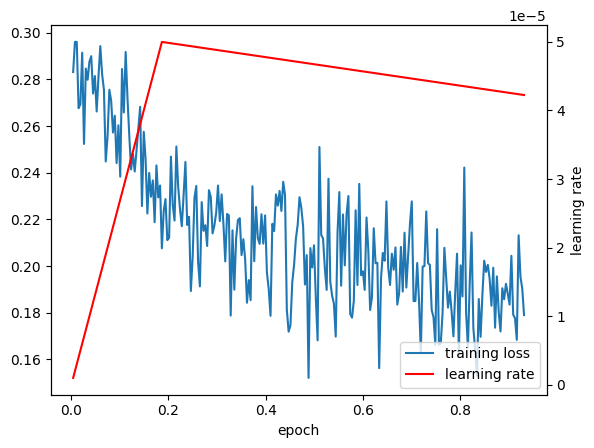

In [3]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

train_loss_keys = sorted(train_loss_record.keys())
train_loss_values = [train_loss_record[k] for k in train_loss_keys]
ax1.plot(train_loss_keys, train_loss_values, label="training loss")
ax1.set_xlabel('epoch')
# ax1.legend()
h1, l1 = ax1.get_legend_handles_labels()
hc1 = [e.get_color() for e in h1]

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.set_ylabel('learning rate')

lr_keys = sorted(lr_record.keys())
lr_values = [lr_record[k] for k in lr_keys]
ax2.plot(lr_keys, lr_values, label="learning rate", color='red')
# ax2.legend()
h2, l2 = ax2.get_legend_handles_labels()
hc2 = [e.get_color() for e in h2]

tmp, _ = ax2.get_legend_handles_labels()
tmp = tmp[0]

colors = hc1 + hc2
labels = l1 + l2
handles = [mlines.Line2D([], []) for _ in range(len(colors))]
for i, h in enumerate(handles):
    h.update_from(tmp)
    h.set_label(labels[i])
    h.set_color(colors[i])

plt.legend(handles, labels) # , bbox_to_anchor=(2.2, 0.5)) # , colors=['blue', 'orange', 'green', 'red'])

# plt.show()
plt.savefig("longformer_snli.png", bbox_inches = 'tight')